In [1]:
import mxnet as mx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:32:08.630154. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [ ]:
!python /home/rakeshr/mxnet/tools/im2rec.py --list=1 --recursive=1 --shuffle=1 --test-ratio=0.2 /home/rakeshr/code/practical_machine_learning/data/dogscats/data_train /home/rakeshr/code/practical_machine_learning/data/dogscats/train

In [ ]:
!python ~/mxnet/tools/im2rec.py --num-thread=4 --pass-through=1 ~/code/practical_machine_learning/data/dogscats/data_train ~/code/practical_machine_learning/data/dogscats/train

In [2]:
data_train = mx.io.ImageRecordIter(
    path_imgrec = "/home/rakeshr/code/practical_machine_learning/data/dogscats/data_train.rec",
    data_shape = (3, 227, 227), # output shape. 
    batch_size = 4,
    resize = 256
)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:32:09.768795. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [ ]:
!python /home/rakeshr/mxnet/tools/im2rec.py --list=1 --recursive=1 --shuffle=1 --test-ratio=0.2 /home/rakeshr/code/practical_machine_learning/data/dogscats/data_valid /home/rakeshr/code/practical_machine_learning/data/dogscats/valid

In [ ]:
!python ~/mxnet/tools/im2rec.py --num-thread=4 --pass-through=1 ~/code/practical_machine_learning/data/dogscats/data_valid ~/code/practical_machine_learning/data/dogscats/valid

In [3]:
data_valid = mx.io.ImageRecordIter(
    path_imgrec = "/home/rakeshr/code/practical_machine_learning/data/dogscats/data_valid.rec",
    data_shape = (3, 227, 227), # output shape. 
    batch_size = 4,
    resize = 256
)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:32:11.856008. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [4]:
# Resnet 34 => Not powerful but quick to process.
sym, arg_params, aux_params = mx.model.load_checkpoint('/home/rakeshr/code/mxnet/models/resnet-34', 0)

# Important -> flatten0. Replce FullyConnected Layer after that. 
# data -> Dimension of data may matter. Apart from that everything else can remain unchanged. 

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:32:16.049750. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [5]:
def get_fine_tune_model(symbol, arg_params, num_classes, layer_name = 'flatten0'):
    all_layers = sym.get_internals()
    net = all_layers[layer_name+"_output"]
    net = mx.sym.FullyConnected(data=net, num_hidden=num_classes, name='fc1')
    net = mx.sym.SoftmaxOutput(data=net, name='softmax')
    new_args = dict({k:arg_params[k] for k in arg_params if 'fc1' not in k})
    return (net, new_args)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:32:16.832520. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [6]:
import logging
head = '%(asctime)-15s %(message)s'
logging.basicConfig(level=logging.DEBUG, format=head)


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:32:18.586481. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [7]:
num_classes = 2
num_ep = 5
batch_size = 4

(new_sym, new_args) = get_fine_tune_model(sym, arg_params, num_classes)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:32:19.674199. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [8]:
fixed_params_list = new_sym.list_arguments()
fixed_params_list.pop()
fixed_params_list.pop()
fixed_params_list.pop()
fixed_params_list.remove('data')
print(fixed_params_list)

['bn_data_gamma', 'bn_data_beta', 'conv0_weight', 'bn0_gamma', 'bn0_beta', 'stage1_unit1_bn1_gamma', 'stage1_unit1_bn1_beta', 'stage1_unit1_conv1_weight', 'stage1_unit1_bn2_gamma', 'stage1_unit1_bn2_beta', 'stage1_unit1_conv2_weight', 'stage1_unit1_sc_weight', 'stage1_unit2_bn1_gamma', 'stage1_unit2_bn1_beta', 'stage1_unit2_conv1_weight', 'stage1_unit2_bn2_gamma', 'stage1_unit2_bn2_beta', 'stage1_unit2_conv2_weight', 'stage1_unit3_bn1_gamma', 'stage1_unit3_bn1_beta', 'stage1_unit3_conv1_weight', 'stage1_unit3_bn2_gamma', 'stage1_unit3_bn2_beta', 'stage1_unit3_conv2_weight', 'stage2_unit1_bn1_gamma', 'stage2_unit1_bn1_beta', 'stage2_unit1_conv1_weight', 'stage2_unit1_bn2_gamma', 'stage2_unit1_bn2_beta', 'stage2_unit1_conv2_weight', 'stage2_unit1_sc_weight', 'stage2_unit2_bn1_gamma', 'stage2_unit2_bn1_beta', 'stage2_unit2_conv1_weight', 'stage2_unit2_bn2_gamma', 'stage2_unit2_bn2_beta', 'stage2_unit2_conv2_weight', 'stage2_unit3_bn1_gamma', 'stage2_unit3_bn1_beta', 'stage2_unit3_conv1_we

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:32:20.929796. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Create Initial Model. Save first checkpooint

Training usually consumes a lot of time on a normal PC like mine. Hence, I train for a batch of epochs at a time and save it as a checkpoint. I continue training from these checkpoints at a later point in time. 

In [13]:
model_prefix = 'cats_and_dogs_rn32'
checkpoint = mx.callback.do_checkpoint(model_prefix)

# Most important attribtue -> fixed_param_names. This ensures that the parameters learnt by the 
# pre-trained model are not overwritten and only the alst FC layer is trained. 
mod = mx.mod.Module(symbol=new_sym, context=mx.gpu(), fixed_param_names = fixed_params_list)
mod.bind(data_shapes=data_train.provide_data, label_shapes = data_train.provide_label)
# Xavier Initialization => Variance for random weight initialization = ( 2 / input_dim of the layer X output_dim of the layer)
mod.init_params(initializer=mx.init.Xavier(rnd_type='gaussian', factor_type="in", magnitude=2))
mod.set_params(new_args, aux_params, allow_missing=True)
mod.fit(data_train, data_valid, num_epoch=num_ep,
        batch_end_callback = mx.callback.Speedometer(batch_size, 10),
        kvstore='device',
        epoch_end_callback = checkpoint,
        optimizer='adam', optimizer_params={'learning_rate':0.01}, eval_metric='acc')
metric = mx.metric.Accuracy()

2017-04-16 10:27:48,581 Already binded, ignoring bind()
/usr/local/lib/python2.7/dist-packages/mxnet-0.9.4-py2.7.egg/mxnet/module/base_module.py:448: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)
2017-04-16 10:27:49,421 Epoch[0] Batch [10]	Speed: 224.60 samples/sec	Train-accuracy=0.636364
2017-04-16 10:27:49,616 Epoch[0] Batch [20]	Speed: 205.75 samples/sec	Train-accuracy=0.625000
2017-04-16 10:27:49,814 Epoch[0] Batch [30]	Speed: 202.79 samples/sec	Train-accuracy=0.650000
2017-04-16 10:27:50,003 Epoch[0] Batch [40]	Speed: 212.48 samples/sec	Train-accuracy=0.850000
2017-04-16 10:27:50,194 Epoch[0] Batch [50]	Speed: 210.53 samples/sec	Train-accuracy=0.750000
2017-04-16 10:27:50,391 Epoch[0] Batch [60]	Speed: 203.63 samples/sec	Train-accuracy=0.800000
2017-04-16 10:27:50,595 Epoch[0] Batch [70]	Speed: 197.16 samples/sec	Train-accuracy=0.975000
2017-04-16 10:27:50,792 Epoch[0] Batch [80]	Sp

## Load the model from the last saved checkpoint. 

In [9]:
model_prefix = 'cats_and_dogs_rn32'
epoch_num = 45
sym, arg_params, aux_params = mx.model.load_checkpoint(model_prefix, epoch_num)

mod = mx.mod.Module(symbol=sym, context=mx.gpu(),fixed_param_names = fixed_params_list)
mod.bind(data_shapes=data_train.provide_data, label_shapes = data_train.provide_label)
mod.set_params(arg_params, aux_params)
metric = mx.metric.Accuracy()

print(mod.score(data_valid, metric))

[('accuracy', 0.97)]


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:32:26.812973. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [17]:
import logging
head = '%(asctime)-15s %(message)s'
logging.basicConfig(level=logging.DEBUG, format=head)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-16 14:31:45.708026. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Train the model from the last saved checkpoint. 

In [18]:
num_ep = 55
batch_size = 16

model_prefix = 'cats_and_dogs_rn32'
checkpoint = mx.callback.do_checkpoint(model_prefix)

mod.fit(data_train, data_valid, num_epoch=num_ep,
        batch_end_callback = mx.callback.Speedometer(batch_size, 500),
        kvstore='device', begin_epoch=45,
        epoch_end_callback = checkpoint,
        optimizer='adam', optimizer_params={'learning_rate':0.0001, 'beta1':0.9}, eval_metric='acc')
metric = mx.metric.Accuracy()
print(mod.score(data_valid, metric))

2017-04-16 14:31:55,856 Already binded, ignoring bind()
2017-04-16 14:32:04,507 Epoch[45] Batch [500]	Speed: 927.73 samples/sec	Train-accuracy=0.901198
2017-04-16 14:32:14,159 Epoch[45] Batch [1000]	Speed: 828.89 samples/sec	Train-accuracy=0.887000
2017-04-16 14:32:22,723 Epoch[45] Batch [1500]	Speed: 934.20 samples/sec	Train-accuracy=0.904500
2017-04-16 14:32:31,143 Epoch[45] Batch [2000]	Speed: 950.26 samples/sec	Train-accuracy=0.899500
2017-04-16 14:32:39,614 Epoch[45] Batch [2500]	Speed: 944.45 samples/sec	Train-accuracy=0.890000
2017-04-16 14:32:48,092 Epoch[45] Batch [3000]	Speed: 943.69 samples/sec	Train-accuracy=0.894500
2017-04-16 14:32:56,525 Epoch[45] Batch [3500]	Speed: 948.76 samples/sec	Train-accuracy=0.901000
2017-04-16 14:33:04,985 Epoch[45] Batch [4000]	Speed: 945.72 samples/sec	Train-accuracy=0.898000
2017-04-16 14:33:13,477 Epoch[45] Batch [4500]	Speed: 942.19 samples/sec	Train-accuracy=0.904500
2017-04-16 14:33:21,961 Epoch[45] Batch [5000]	Speed: 942.97 samples/sec

[('accuracy', 0.97)]


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-16 14:31:55.851306. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Test data

In [1]:
!python /home/rakeshr/mxnet/tools/im2rec.py --list=1 --recursive=1 --shuffle=1 /home/rakeshr/code/practical_machine_learning/data/dogscats/data_test /home/rakeshr/code/practical_machine_learning/data/dogscats/test1/

. 0


In [2]:
!python ~/mxnet/tools/im2rec.py --num-thread=4 --pass-through=1 /home/rakeshr/code/practical_machine_learning/data/dogscats/data_test /home/rakeshr/code/practical_machine_learning/data/dogscats/test1

Creating .rec file from /home/rakeshr/code/practical_machine_learning/data/dogscats/data_test.lst in /home/rakeshr/code/practical_machine_learning/data/dogscats
time: 0.00117301940918  count: 0
time: 0.102708101273  count: 1000
time: 0.0931508541107  count: 2000
time: 0.0793161392212  count: 3000
time: 0.0774099826813  count: 4000
time: 0.0840618610382  count: 5000
time: 0.0797901153564  count: 6000
time: 0.0752868652344  count: 7000
time: 0.0840129852295  count: 8000
time: 0.0757191181183  count: 9000
time: 0.0740098953247  count: 10000
time: 0.0800700187683  count: 11000
time: 0.0844919681549  count: 12000


In [10]:
test_dataiter = mx.io.ImageRecordIter(
        path_imgrec = "/home/rakeshr/code/practical_machine_learning/data/dogscats/data_test.rec",
        rand_crop=False,
        rand_mirror=False,
        data_shape=(3,227,227),
        batch_size=4,
        resize=256,
        round_batch=False)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:32:54.499128. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
prob = mod.predict(test_dataiter)
logging.info('Finish Prediction')

2017-04-17 08:33:59,029 Finish Prediction
/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:33:34.374973. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [19]:
result = []
dim = prob.shape[0]
for i in range(dim):
    x = np.argmax(prob[i].asnumpy())
    y = np.max(prob[i].asnumpy())
    res_tuple = [x, y]
    result.append(res_tuple)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 08:38:33.058596. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [67]:
loop_counter = 0

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 09:11:51.936843. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


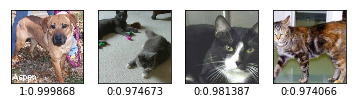

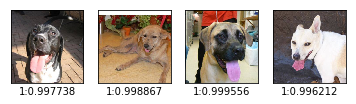

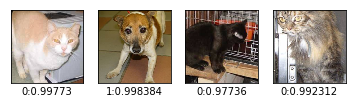

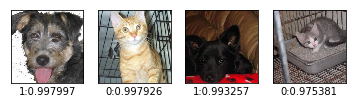

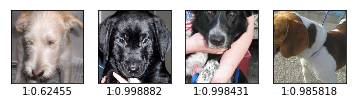

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-04-17 09:12:10.140293. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [69]:
#test_dataiter.reset()

for j in range(5):
    batch = test_dataiter.next()
    data = batch.data[0]

    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(data[i].asnumpy().astype(np.uint8).transpose((1, 2, 0)))
        
        plt.xlabel(str(result[loop_counter*20+4*j+i][0])+":"+str(result[loop_counter*20+4*j+i][1]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
loop_counter += 1

#test_dataiter.reset()